**Экономисты ЭФ НГУ, 22.03.2023**

## Метод наименьших квадратов

$$f(x) =kx+b$$

$$y = f(x) + e$$

**Минимизация суммы квадратов остатков:**

$$MSE = S_e^2=\frac1n\sum\limits_{i=1}^n(y_i-kx_i-b)^2) \rightarrow \min\limits_{k,b}$$

**Условия первого порядка (First order conditions - FOC):**

$$\begin{equation}
    \begin{matrix}
    \left\{
    \begin{matrix}
    \sum\limits_{i=1}^n(y_i - kx_i-b)x_i=0\\
    \sum\limits_{i=1}^n(y_i - kx_i-b)=0
    \end{matrix} \right.
    \end{matrix}
\end{equation}$$

$$\Rightarrow\begin{equation}
    \begin{matrix}
    \left\{
    \begin{matrix}
    \\cov(e_i,x_i)=0\\
    \sum\limits_{i=1}^ne_i=0
    \end{matrix} \right.
    \end{matrix}
\end{equation}$$

**Из FOC получаем,что остатки на коррелируют с фактором и сумма остатков равна нулю** 

**Из второго уравнения системы получаем:**$$b=\bar y - k \bar x$$

$$\sum\limits_{i=1}^ny_ix_i-\bar y\sum\limits_{i=1}^nx_i - k\sum\limits_{i=1}^nx_i^2-\bar x\sum\limits_{i=1}^nx_i$$

**Подставляем в первое уравнение, получаем:** $$\sum\limits_{i=1}^n(y_i - kx_i-\bar y + k \bar x)x_i=\sum\limits_{i=1}^n((y_i-\bar y) - k(x_i-\bar x))x_i=\sum\limits_{i=1}^ny_ix_i-\bar y\sum\limits_{i=1}^nx_i - k(\sum\limits_{i=1}^nx_i^2-\bar x\sum\limits_{i=1}^nx_i)=0$$

$$k=\frac{\sum\limits_{i=1}^ny_ix_i-\bar y\sum\limits_{i=1}^nx_i}{\sum\limits_{i=1}^nx_i^2-\bar x\sum\limits_{i=1}^nx_i} = \frac{\overline{yx}-\bar y\bar x}{\overline{x^2}-\overline{x}^2}=\frac{cov(y,x)}{var(x)}$$

$$b=\bar y - k \bar x\\k = \frac{cov(y,x)}{var(x)}$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [65]:
n = 100 # число наблюдений
sigma = 3 # стандартное отклонение наблюдаемых значений
k = 0.5 # теоретическое значение k
b = 2 # теоретическое значение b

In [70]:
np.random.seed(36313) # мы фиксируем случайные значения
f = np.array([k*x+b for x in range(0,n)]) # теоретическая прямая
y = f + np.random.normal(0,sigma,n) # значения целевой переменной

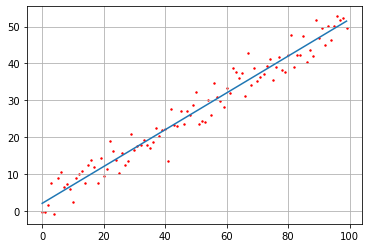

In [71]:
x = np.array(range(n)) # значения от 0 до 99
plt.plot(f)
plt.scatter(x,y,s=2,c='red')
plt.grid(True)
plt.show()

**Теперь представим, что значения k и b нам неизвестны, а лишь известны значения целевой переменной y,попробуем найти оценки**

$$k_* = \frac{\overline{yx}-\bar y\bar x}{\overline{x^2}-\overline{x}^2}$$

In [72]:
y_mean = y.sum()/n
x_mean = x.sum()/n
yx_mean = np.dot(x.T,y)/n 
mean_x_sq = np.dot(x.T,x)/n

k_estimate = (yx_mean - y_mean*x_mean)/(mean_x_sq-x_mean**2)
b_estimate = y_mean-k_estimate*x_mean

In [44]:
y_pred = k_estimate*x+b_estimate # расчетные значения

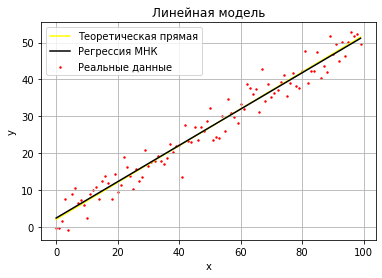

In [75]:
x = np.array(range(n))
plt.plot(f,c='yellow')
plt.plot(y_pred,c='black')
plt.scatter(x,y,s=2,c='red')
plt.grid(True)
plt.legend(['Теоретическая прямая','Регрессия МНК','Реальные данные'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Линейная модель')
plt.show()

## Метод градиентного спуска

Алгоритм направленного поиска 

$$x_{n+1} = x_n - \alpha\frac{\partial f(x_n)}{\partial x_n}$$

$$\alpha  - шаг\:обучения\:(learning\:rate)$$

**Градиент показывает, в каком направлении нужно двигаться, чтобы найти точку экстремума**

**Суть градиентного спуска состоит в том, что рассматриваемые значения (параметры модели) рекурсивно двигаются в сторону антиградиента**

Рассмотрим функцию: $$f(x) = x^2 - 5x + 5\\$$
$$\frac{\partial f(x)}{\partial x}=2x-5$$

In [22]:
# инициализируем функции
def f(x):
    return x**2 - 5*x + 5
def df(x):
    return 2*x - 5

In [42]:
n = 200 # число итераций
x = 0 # начальное значение
alpha  = 0.1 # шаг сходимости (шаг обучения или learning rate)

In [43]:
# Для визуализации процесса
x_plt = np.arange(0,5.0,0.1) # диапазон значений x (отображаемая область определения)
f_plt = [f(x) for x in x_plt]

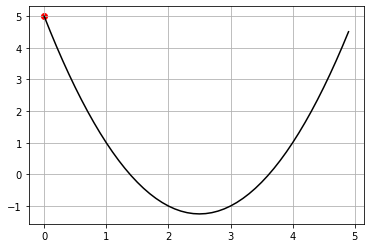

In [44]:
# plt.ion() # включение интерактивного режима отображения графиков
fig, ax = plt.subplots() # Создание окна и осей для графика
ax.grid(True) # отображение сетки на графике

ax.plot(x_plt,f_plt,c = 'black') # Отображение параболы
point = ax.scatter(x,f(x),c = 'red') # отображение точки красным цветом

Стационарная точка x = 2.499999999999999


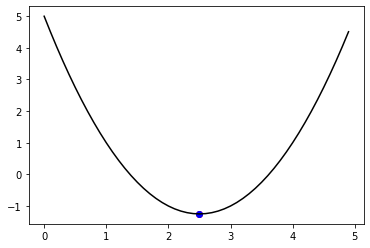

In [45]:
fig, ax = plt.subplots() # Создание окна и осей для графика
ax.plot(x_plt,f_plt, c = 'black') # Отображение параболы
point = ax.scatter(x,f(x),c = 'red') # отображение точки красным цветом
for i in range(0,n): # [0,n)
    x = x - alpha*df(x) # формула градиентного спуска 
    point.set_offsets([x,f(x)]) # отображение нового положения точки
    # перерисовка графика;
    fig.canvas.draw()
    fig.canvas.flush_events()
    # time.sleep(0.1)
plt.ioff()
print(f"Стационарная точка x = {x}")
ax.scatter(x,f(x),c='blue')
plt.show()

После всего этого начинаются тонкости:

- А как вычислять градиент?
- А как выбрать размер шага?
- А есть ли какие-то теоретические оценки сходимости?

**Выбор шага сходимости** $$\alpha_i = \frac{1}{min(i+1,m)},\quad i = 0,1,2,\dots,n-1$$

**На каждой итерации $\alpha$ снижается и доходит до минимального значения $\frac1{m}$,m - некоторая константа (нижняя граница), чтобы шаг не устремился к нулю**

**Другой подход состоит в том, чтобы нормализовать градиент функции $\frac{\partial f(x)}{\partial x}$, чтобы его норма (длина градиента) равнялась 1**

Градиент любой функции может быть представлен в виде вектора, элементы которого являются частные производные по аргументам функции:

$$gradf(x,y,z,\dots)=\left\{
  \begin{array}{ccc}
  \frac{\partial f(x,y,z,\dots}{\partial x},\frac{\partial f(x,y,z,\dots}{\partial y},\frac{\partial f(x,y,z,\dots}{\partial z},\dots \\
  \end{array}
\right\}$$

Далее вычисляется норма вектора (длина вектора):

$$\|gradf(x,y,z,\dots)\|=\sqrt{{\frac{\partial f}{\partial x}}^2+{\frac{\partial f}{\partial y}}^2+{\frac{\partial f}{\partial z}}^2+\dots}$$

Производим нормировку вектора $f$

$$grad\:\psi(x,y,z,\dots)=\frac{gradf(x,y,z,\dots)}{\|gradf(x,y,z,\dots)\|}$$

$$\Rightarrow\|grad\:\psi(x,y,z,\dots)\|=1$$

$grad\:\psi(x,y,z,\dots)$ уже будет иметь единичную длину. Если градиент имеет единичную длину,то его величина не будет влиять на скорость сходимости алгоритма. То есть нам важно направление градиента, а не его значение

$$\overline{x}_{n+1}=\overline{x}_{n}-\alpha\cdot grad\:\psi=\overline{x}_{n}-\frac{\alpha}{\|gradf\|}gradf$$

В одномерном случае это будет означать, что мы берем знак градиента 

$$\begin{equation*}
sign\:\psi=grad\:\psi = 
 \begin{cases}
   1 &\frac{df(x)}{dx}\gt0\\
   0 &\frac{df(x)}{dx}=0\\
   -1 &\frac{df(x)}{dx}\lt0\\
 \end{cases}
\end{equation*}$$

Стационарная точка x = 2.49990313519834


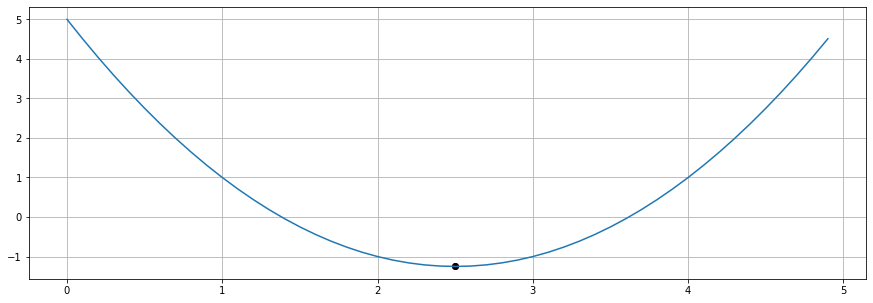

In [46]:
fig, ax = plt.subplots(figsize = (15,5)) # Создание окна и осей для графика
ax.plot(x_plt,f_plt) # Отображение параболы
ax.grid(True)
point = ax.scatter(x,f(x),c = 'red') # отображение точки красным цветом
for i in range(n):
    m = 100
    alpha = 1/min(i+1,m)
    x = x - alpha*np.sign(df(x)) # формула нормализованного градиентного спуска
    
    point.set_offsets([x,f(x)]) # отображение нового положения точки
    
    # перерисовка графика и задержка 100 мс
    fig.canvas.draw()
    fig.canvas.flush_events()
    # time.sleep(0.1)
plt.ioff()
print(f"Стационарная точка x = {x}")
ax.scatter(x,f(x),c='black')
plt.show()

### Но бывают функции сложнее - с несколькими локальными экстремумами

$$f(x) = \sin(x) + 0.5\cdot x\\
\frac{\partial f(x)}{\partial x}=\cos(x) + 0.5$$


In [10]:
# инициализируем функции
def f(x):
    return np.sin(x) + 0.5*x
def df(x):
    return np.cos(x) + 0.5

In [13]:
x_plt = np.arange(-5.,5.,0.1)
f_plt = [f(x) for x in x_plt]
x = 0 # начальная точка

Стационарная точка x = -2.2


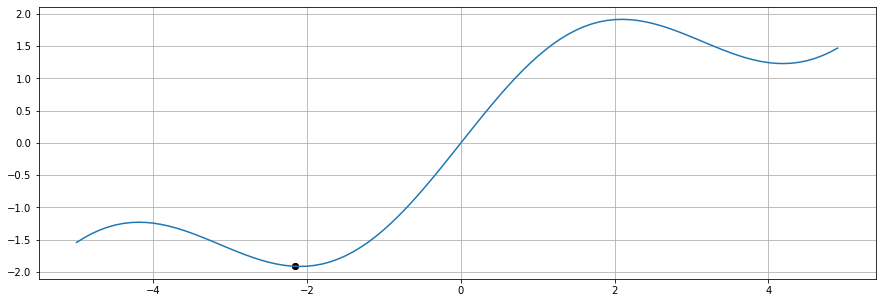

In [14]:
fig, ax = plt.subplots(figsize = (15,5)) # Создание окна и осей для графика
ax.plot(x_plt,f_plt) # Отображение параболы
ax.grid(True)
point = ax.scatter(x,f(x),c = 'red') # отображение точки красным цветом
for i in range(n):
    m = 100
    alpha = 1/min(i+1,m)
    x = x - alpha*np.sign(df(x)) # формула градиентного спуска
    
    point.set_offsets([x,f(x)]) # отображение нового положения точки
    
    # перерисовка графика и задержка 100 мс
    fig.canvas.draw()
    fig.canvas.flush_events()
    # time.sleep(0.1)
plt.ioff()
print(f"Стационарная точка x = {round(x,1)}")
ax.scatter(x,f(x),c='black')
plt.show()

## Градиентный спуск при двух параметрах

$$y=kx+b$$

In [47]:
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

In [48]:
n = 100 # количество наблюдений
n_iter = 50 # число итераций алгоритма градиентного спуска
sigma = 3 # стандартное отклонение наблюдаемых значений
k = 0.5 # теоретическое значение параметра k
b = 2 # теоретическое значение параметра b

k_estimate = 0 # начальное приближение истинного параметра k
b_estimate = 0 # начальное приближение истинного параметра b
alpha1 = 0.000001 # шаг сходимости
alpha2 = 0.0005 # шаг сходимости


$$RSS =e^Te=\sum \limits_{i=1}^{n}e_i^2$$

In [55]:
fff = np.array([k*x + b for x in range(n)]) # теоретическая прямая
y = np.array(fff+np.random.normal(0,sigma,n)) # экспериментальные значения

In [56]:
def RSS(y,k,b):
    f = np.array([k*x+b for x in range(n)]) # расчетные значения
    return np.dot((y-f).T,(y-f))
def dRSS_dk(y,k,b):
    f = np.array([k*x+b for x in range(n)])
    return -2*np.dot((y-f).T, range(n))
def dRSS_db(y,k,b):
    f = np.array([k*x+b for x in range(n)])
    return -2*(y-f).sum()

In [57]:
k_plt = np.arange(1,2,0.1)
b_plt = np.arange(0,3,0.1)
RSS_plt = np.array([[RSS(y,k,b) for k in k_plt] for b in b_plt])

0.35247748314695687 0.9668081393034448
0.4639116025322031 1.285336573719576
0.4990135042164384 1.3982577513571295
0.5099460674060247 1.4457706234424756
0.5132288389153646 1.4722824893480544
0.5140933469020559 1.4918638541289535
0.5141962769825561 1.5089775785332868
0.5140621870075889 1.5250436758732744
0.5138570995555167 1.5405183463670202
0.5136334937953323 1.5555523983243045
0.5134078928234839 1.5701997698965102
0.5131854350312834 1.5844835703828872
0.5129676556464059 1.5984169987757706
0.5127549510424879 1.6120099721187597
0.5125473591158672 1.625271228164222
0.5123448063726084 1.6382089946842695
0.512147186127299 1.6508312047665936
0.5119543832172694 1.663145568245332
0.5117662817798166 1.6751595974915876
0.5115827676668012 1.6868806186726442
0.5114037291621105 1.6983157783338139
0.5112290571628046 1.7094720484254307
0.511058645191536 1.7203562307656657
0.5108923893566311 1.7309749612546566
0.5107301882966673 1.741334713941569
0.5105719431211813 1.751441804978446
0.5104175573511718

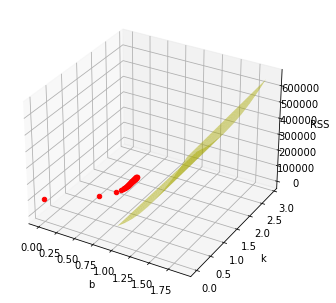

In [58]:
plt.ion() # включение интерактивного режима отображения графиков
fig = plt.figure()
ax = Axes3D(fig)
kk,bb = np.meshgrid(k_plt,b_plt)
ax.plot_surface(kk,bb,RSS_plt, color='y',alpha = 0.5)
ax.set_ylabel('k')
ax.set_xlabel('b')
ax.set_zlabel('RSS')

point = ax.scatter(k_estimate,b_estimate, RSS(y,k_estimate,b_estimate),c='red')
for i in range(n_iter):
    k_estimate = k_estimate - alpha1*dRSS_dk(y,k_estimate,b_estimate)
    b_estimate = b_estimate - alpha2*dRSS_db(y,k_estimate,b_estimate)
    ax.scatter(k_estimate,b_estimate,RSS(y,k_estimate,b_estimate), c = 'red')
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    print(k_estimate,b_estimate)
plt.ioff()
plt.show()

**Отображение графиков аппроксимации**

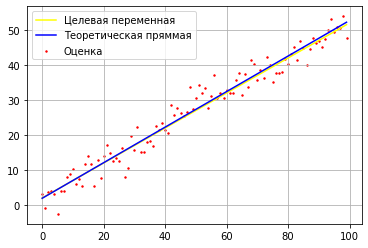

In [61]:
ff = np.array([k_estimate*x+b_estimate for x in range(n)]) # расчетные значения
plt.scatter(range(n), y , s=2, c='red')
plt.plot(fff,c = 'yellow')
plt.plot(ff,c='blue')
plt.grid(True)
plt.legend(['Целевая переменная', 'Теоретическая пряммая','Оценка'])
plt.show()

**Методы оптимизации**
- Избежать попадания в локальный минимум;
- Обеспечить наибольшую скорость сходимости

**Как увеличить скорость сходимости?**

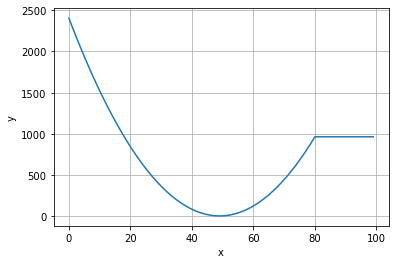

In [325]:
def parab():
    f = []
    for i in range(-50,50,1):
        if i <= 30:
            f.append(i**2 + 2*i + 3)
        else: f.append(963)
    plt.plot(f)
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
parab()

**Градиентный спуск происходит по такому правилу:** $$x_{n+1} = x_n - \nu_{n+1}$$

В случае, когда $\nu_{n+1}$ имеет такой вид:

$$\nu_{n+1} = \alpha_n \cdot \frac{\partial f(x)}{\partial x}$$

Мы не будем смещаться в сторону минимума, а так и останемся в данной точке, если попадем на горизонтальный участок, потому что производная здесь равна нулю. В реальности такие вырожденные ситуации возникают не так часто, но в любом случае, чтобы увеличить скорость сходимости,можно $\nu_{n+1}$ представить следующим образом:

$$\nu_{n+1}= \gamma\nu_n + \alpha_n \cdot \frac{\partial f(x)}{\partial x},\\$$ $$где\ \gamma \in [0,1] $$

Обычно $0<\gamma<1$ выбирается ближе к 1 (например, 0.9). Давайте разберемся, как работает слагаемое $\gamma \nu_n$ на примере $\nu_5$:

$$\nu_5 = \gamma \cdot \nu_4 + \nabla f_4 = \gamma \cdot(\gamma \nu_3 + \nabla f_3)) + \nabla f_4 = \gamma \cdot(\gamma \cdot(\gamma \nu_2 + \nabla f_2)+\nabla f_3) + \nabla f_4 =\\ \gamma \cdot(\gamma \cdot(\gamma \cdot(\gamma \nu_1 + \nabla f_1) + \nabla f_2) + \nabla f_3) + \nabla f_4 =\\ \nabla f_4 + \gamma \nabla f_3 + \gamma^2 \nabla f_2 + \gamma^3 \nabla f_1 + \gamma^4 \nu_1 $$

То есть мы в итоге получаем накопленную сумму $\nu_5$. Раз $\nu$ накапливается с каждым шагом, то и смещение ($\nu_{n+1}$) в данной формуле $x_{n+1} = x_n - \nu_{n+1}$ будет увеличиваться. И по инерции мы начинаем двигаться быстрее в сторону антиградиента.

**Ускоренные градиенты Нестерова**

Отличие заключается в том, что градиент берется не в самой точке $x_n$: $\frac{\partial (x_n)}{\partial x}$, а в опережающей точке $x_n - \gamma \nu_n$: $\frac{\partial (x_n - \gamma \nu_n)}{\partial x}$

Такой подход повышает скорость градиентного алгоритма еще больше

Другие методы оптимизации:
- **Adagrad** - учитывает при оптимизации квадраты градиентов;
- **RMSProp** и **Adadelta** - подобны Adagrad, но пытаются бороться с чрезмерным накоплением квадратов градиентов;
- **Adam** - смесь алгоритма с моментом и квадратом градиентов

## Стохастический градиентный спуск (SGD - Stochastic Gradient Descent)

Когда признаков "очень много" матрица $(X^TX)^{-1}$ может быть плохо обусловлена: она может не существовать или иметь большую размерность. Обращать такие матрицы численно очень сложно, а иногда невозможно

Для дифференцируемых функций потерь самым простым и действенным методом оптимизации (нахождения минимума) является применение градиентных алгоритмов.

$$Q(\omega)=\frac1n\sum\limits_{i=1}^nL_i(\omega) \rightarrow \min\limits_{\omega}$$

Прицнип работы градиентого спуска для вектора параметров $\omega = [\omega_1,\omega_2,\dots,\omega_n]^T$ - в каждой точке определяется не одна производная, а вектор производных (n штук), который и будет определять направление в n-мерном пространстве

$$\begin{equation*}
\nabla Q(\omega_t) = \left(
\begin{array}{cccc}
\frac{\partial Q(\omega_t)}{\partial \omega_1^(t)}\\
\ldots\\
\frac{\partial Q(\omega_t)}{\partial \omega_n^(t)}
\end{array}
\right)
\end{equation*}$$

- Далее уточняется каждый раз значение $\omega$ на каждой новой итерации $t$

$$\omega^{(t+1)} = \omega^{(t)} - \eta_t \nabla Q(\omega^{(t)})$$

$$\omega^{(t+1)} = \omega^{(t)} - \eta_t \sum\limits_{i=1}^{n}\nabla L_i(\omega^{(t)},x_i)$$

Представьте, что выборка состоит из 1 млн. объектов (наблюдений), что часто встречается в задачах машинного обучения. Поэтому в практической реализации считать градиент по всем обьектам на каждой итерации вычислительно "очень дорого". Как же тогда поступить? 

Градиент заменяют псевдоградиентом (или субградиентом), который должен обладать одним главным свойством: в среднем субградиент должен образовывать острый угол в n-мерном признаковом пространстве с истинным градиентом (В среднем, а не всегда!). Если это выполняется, то за конечное число шагов мы придем к точке минимума. И второе условие, которое накладывается на псевдоградиент - чтоб он вычислялся проще. 
- ***Вопрос***: что взять в качестве псевдоградиента? То есть как можно сократить объем вычислений истинного градиента, при этом сохранив сходимость алгоритма к точке локального минимума?

Самое простое, что можно сделать - брать по одному наблюдению каждую итерацию: на каждом шаге берется одно случайное слагаемое $k$ и по нему вычисляется приближение

$$\omega^{(t+1)} = \omega^{(t)} - \eta_t \cdot \nabla L_k(\omega^{(t)},x_k),\\ \text{k - случайный объект, который берется из обучающей выборки}$$

$$\nabla \tilde{Q}(\omega^{(t)})=\nabla L_k(\omega^{(t)},x_k) - \text{псевдоградиент для k-ого случайного объекта}$$

Вот такая идея,когда мы вычисляем градиент не по всей выборке, а только по k-му случайному объекту и называется **"стохастический градиентный спуск" или метод Роббинсона-Монро**

**Алгоритм работы SGD:**

- Вход: обучающая выборка $X_{n}$, шаг сходимости $\eta$, скорость "забывания" $\lambda$.
- Выход: вектор весовых коэффициентов $\omega$.
1) Инициализация весов с некоторыми начальными значениями;
2) Начальное вычисление функционала качества: $$\bar Q(w) = \frac{1}{n}\sum\limits_{i=1}^{n}L_i(\omega) - \text{среднее арифметическое по объектам обучающейся выборки}$$
3) Запускаем цикл:
4) | случайный выбор наблюдения $x_{k}$ из $X_{n}$
5) | вычисление функции потерь $\varepsilon_k = L_l(\omega)$
6) | шаг псевдоградиентного алгоримта: $\omega = \omega - \eta \nabla L_k(\omega)$
7) | пересчет функционала качества: $\bar Q = \lambda \varepsilon_k + (1-\lambda)\bar Q - \text{экспоненциальное скользящее среднее}$
8) | пока $\bar Q$ и/или $\omega$ не достигнут заданных значений

**Скользящее экспоненциальное среднее**

$$\bar Q_m = \frac1m \varepsilon_m + \frac1m \varepsilon_{m-1} + \frac1m \varepsilon_{m-2} + \dots + \frac1m \varepsilon_{1}$$

Ту же самую формулу можно переписать так:

$$m \cdot \bar Q_m - \varepsilon_m = \varepsilon_{m-1} + \varepsilon_{m-2} + \dots + \varepsilon_{1}$$

$$\bar Q_{m-1} =\frac{1}{m-1}[m \cdot \bar {Q}_m - \varepsilon_m] = \frac{m}{m-1} \bar Q_m - \frac{1}{m-1}\varepsilon_m$$

Выражаем $\bar Q_m$:

$$\bar Q_m = \frac{1}{m}\varepsilon_m + (1-\frac{1}{m})\bar Q_{m-1} =  \lambda\varepsilon_m + (1-\lambda)\bar Q_{m-1} - \text{формула рекурентного счета среднего арифметического при появлении нового слагамоего } \varepsilon_m$$

Почему так называется - скользящее экспоненциальное среднее?
$$\bar Q_m = \lambda\varepsilon_m + (1-\lambda)\bar Q_{m-1}$$

$$\bar Q_m = \lambda\varepsilon_m + (1-\lambda) \lambda \varepsilon_{m-1} + (1-\lambda)^2 \lambda \varepsilon_{m-2} + \dots$$

### Алгоритм SAG (Stochastic Average Gradient)

Еще одна реализация стохастического градиентного спуска, предложенной группой зарубежных ученых в 2013 году.
- Вход: обучающая выборка $X_{n}$, шаг сходимости $\eta$, скорость "забывания" $\lambda$.
- Выход: вектор весовых коэффициентов $\omega$.
1) Инициализация весов $\omega$ с некоторыми начальными значениями;
2) Инициализация всех градиентов $G_i = \nabla L_i(\omega), i = 1,2,\dots,n$
3) Вычисление среднего градиента по всей выборке $\bar G = \frac{1}{n}\sum\limits_{i=1}^{n}G_i$
4) Начальное вычисление функционала качества: $$\bar Q(w) = \frac{1}{n}\sum\limits_{i=1}^{n}L_i(\omega) - \text{среднее арифметическое по объектам обучающейся выборки}$$
5) Запускаем цикл:
6) | случайный выбор наблюдения $x_{k}$ из $X_{n}$
7) | вычисление функции потерь $\varepsilon_k = L_l(\omega)$
8) | вычисление градиента $G_k = \nabla L_k(\omega)$
9) | шаг псевдоградиентного алгоритма: $\omega = \omega -\eta \cdot \frac1n \cdot \sum\limits_{i=1}^{n}G_i$
10) | пересчет функционала качества: $\bar Q = \lambda \varepsilon_k + (1-\lambda)\bar Q - \text{экспоненциальное скользящее среднее}$
8) | пока $\bar Q$ и/или $\omega$ не достигнут заданных значений